In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os, csv
import pandas as pd
import scipy.optimize as sp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

%run ../aux_funcs.py
%run ../RSRG.py
%run ../RSRG_class.py

In [2]:
log_file = pd.read_csv("Loglog_file.csv")
ts_list = log_file['ts'].tolist()
log_file

,L,steps,a,b,w,n_runs,ts
0,40,1587,0.1,0.105,2.9,60,1678148035


In [3]:
ts = str(ts_list[0])

with open("LogIsing_2D_output_"+ts+".pkl", "rb") as fp:   # Unpickling
    output_data = pickle.load(fp)

with open("LogIsing_2D_input_"+ts+".pkl", "rb") as fp:   
    input_dict = pickle.load(fp)
    
Gammas = np.array([])
dec_types = np.array([])
h_array, J_array = [], []


for core, item in enumerate(output_data):
    zeta_dist_list, beta_dist_list, Gamma_list_composite, decimation_type_composite = item
    Gammas = np.concatenate((Gammas, Gamma_list_composite))
    dec_types = np.concatenate((dec_types, decimation_type_composite))
    if core==0:
        beta_array = beta_dist_list
        zeta_array = zeta_dist_list

    else:
        for i in range(len(input_dict['measure_list'])):
            beta_array[i] = np.concatenate((beta_array[i], beta_dist_list[i]))
            zeta_array[i] = np.concatenate((zeta_array[i], zeta_dist_list[i]))
        
        
with open("LogIsing_2D_clusters_"+ts+".pkl", "rb") as fp:   
    clust_list_final = pickle.load(fp)
    
#print(input_dict)


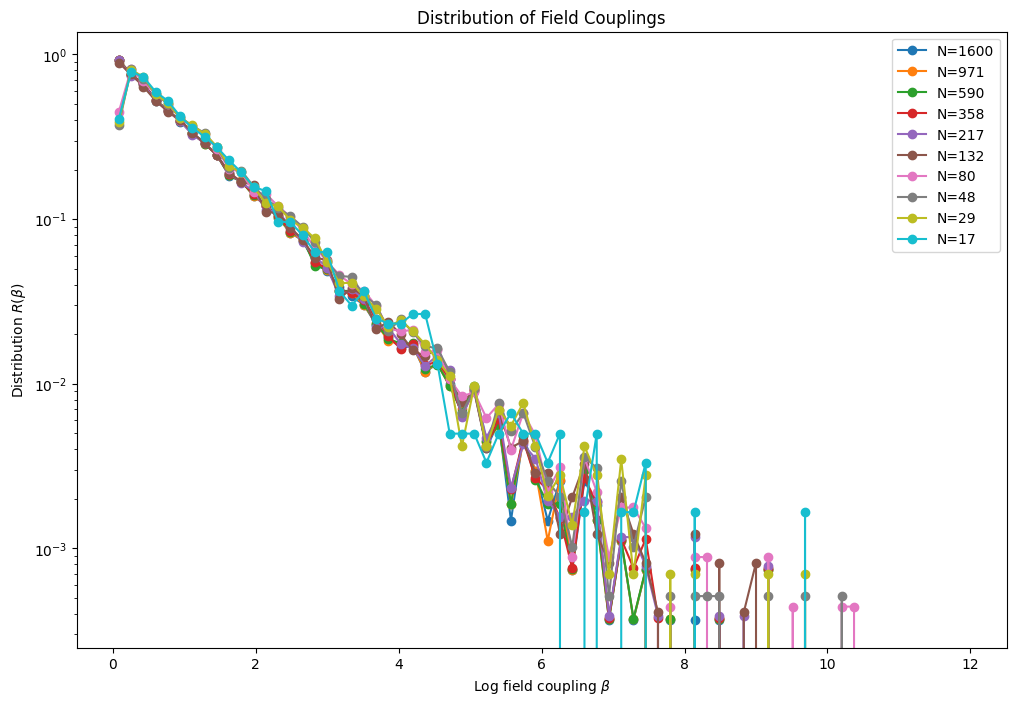

In [4]:
measure_list = input_dict['measure_list']
n_runs = input_dict['n_runs']
n_bins_h = 70
width_list = []
plt.figure(figsize=(12, 8))

for i,step in enumerate(measure_list[:-1]): 
    n,bins = np.histogram(beta_dist_list[i], density=True, bins = n_bins_h, range=(0,12))
    width = bins[1]-bins[0]
    x = (bins[1:]-width/2)
    y = n
    if i%2==0: plt.plot(x, y, label="N="+str(step), marker='o')

    popt, pcov = curve_fit(exponential_dist_norm, x[:20], y[:20])
    #plt.plot(x, exponential_dist_norm(x, *popt))
    width_list.append(1/popt[0])

plt.yscale('log')
#plt.xlim(0, 6)
#plt.ylim(1e-1, 1)

plt.xlabel(r"Log field coupling $\beta$")
plt.ylabel(r"Distribution $R(\beta)$")
plt.title("Distribution of Field Couplings")
#plt.yscale('log')
plt.legend()

[0.24954869 3.75132292]


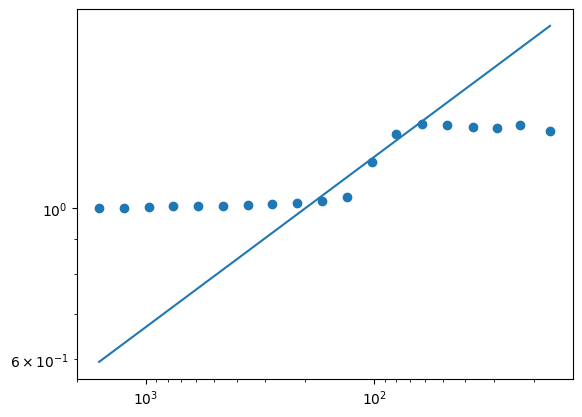

In [6]:
plt.scatter(measure_list[:-1], width_list)
x = measure_list[:-1]

popt, pcov = curve_fit(power_law_scale, x[-8:-5], width_list[-8:-5])
plt.plot(x, power_law_scale(x, *popt))
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
print(popt)